In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

boston_1 = load_boston()
boston = pd.DataFrame(boston_1.data, columns=boston_1.feature_names)
boston['MEDV'] = boston_1.target

info={'CRIM' :    'per capita crime rate by town',
        'ZN' :      'proportion of residential land zoned for lots over 25,000 sq.ft',
        'INDUS'    :'proportion of non-retail business acres per town',            
        'CHAS'     :'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
         'NOX'      :'nitric oxides concentration (parts per 10 million)',
         'RM'      : 'average number of rooms per dwelling',
        'AGE'     :'proportion of owner-occupied units built prior to 1940',
        'DIS'      :'weighted distances to five Boston employment centres',
        'RAD'      :'index of accessibility to radial highways',
         'TAX'      :'full-value property-tax rate per $10,000',
         'PTRATIO'  :'pupil-teacher ratio by town',
         'B'        :'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
         'LSTAT'    :'% lower status of the population',
         'MEDV'     :'Median value of owner-occupied homes in $1000s'}

<AxesSubplot:ylabel='RM'>

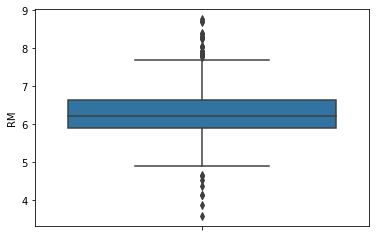

In [2]:
sns.boxplot(y='RM',data=boston)

In [3]:
boston[boston['RM']<=5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,11.8
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53,14.6
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,16.1
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8


In [4]:
boston[boston['MEDV']>=50.0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


In [5]:
final_boston=boston[['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']]

In [6]:
a=final_boston[final_boston['MEDV']>=50.0].index
a

Int64Index([161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
            370, 371, 372],
           dtype='int64')

In [7]:
final_boston.drop(index=a,inplace=True)

<AxesSubplot:ylabel='MEDV'>

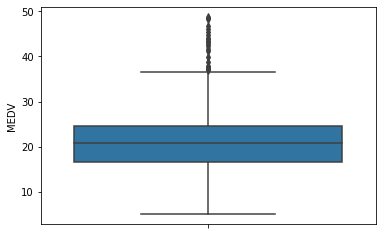

In [14]:
sns.boxplot(y='MEDV',data=final_boston)

<AxesSubplot:>

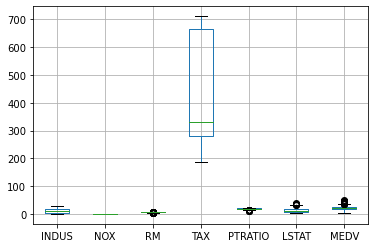

In [9]:
final_boston.boxplot()

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

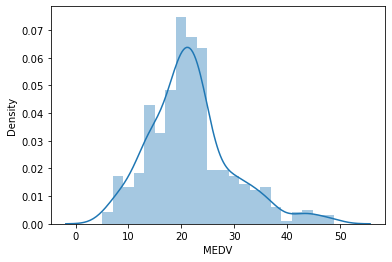

In [13]:
sns.distplot(final_boston['MEDV'])

<AxesSubplot:ylabel='RM'>

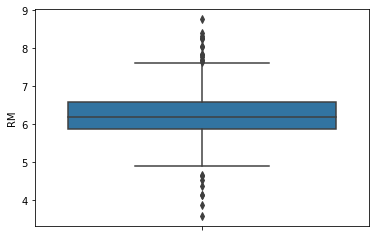

In [15]:
sns.boxplot(y='RM',data=final_boston)

In [16]:
final_boston[final_boston['RM']>=8]

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
97,2.89,0.445,8.069,276.0,18.0,4.21,38.7
224,6.20,0.504,8.266,307.0,17.4,4.14,44.8
226,6.20,0.504,8.040,307.0,17.4,3.13,37.6
232,6.20,0.507,8.337,307.0,17.4,2.47,41.7
233,6.20,0.507,8.247,307.0,17.4,3.95,48.3
253,5.86,0.431,8.259,330.0,19.1,3.54,42.8
262,3.97,0.647,8.398,264.0,13.0,5.91,48.8
364,18.10,0.718,8.780,666.0,20.2,5.29,21.9


In [18]:
final_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
INDUS,490.0,11.113143,6.821302,0.740,5.1900,9.690,18.1000,27.740
NOX,490.0,0.554307,0.116688,0.385,0.4490,0.538,0.6240,0.871
RM,490.0,6.245471,0.653147,3.561,5.8810,6.185,6.5780,8.780
TAX,490.0,408.002041,168.065190,187.000,280.2500,330.000,666.0000,711.000
PTRATIO,490.0,18.520000,2.110478,12.600,17.4000,19.100,20.2000,22.000
LSTAT,490.0,12.924020,7.083180,1.980,7.3475,11.675,17.1175,37.970
MEDV,490.0,21.635918,7.865301,5.000,16.7000,20.900,24.6750,48.800


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

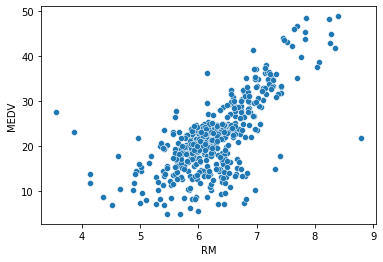

In [19]:
sns.scatterplot(y='MEDV',x='RM',data=final_boston)

In [20]:
boston[boston['RM']==8.780]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
364,3.47428,0.0,18.1,1.0,0.718,8.78,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9


In [24]:
final_boston.drop(index=364,inplace=True)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

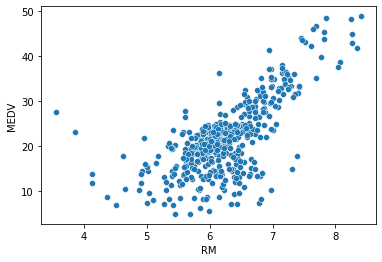

In [25]:
sns.scatterplot(y='MEDV',x='RM',data=final_boston)

In [26]:
final_boston[final_boston['TAX']==666.0000]

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
356,18.1,0.770,6.212,666.0,20.2,17.60,17.8
357,18.1,0.770,6.395,666.0,20.2,13.27,21.7
358,18.1,0.770,6.127,666.0,20.2,11.48,22.7
359,18.1,0.770,6.112,666.0,20.2,12.67,22.6
360,18.1,0.770,6.398,666.0,20.2,7.79,25.0
...,...,...,...,...,...,...,...
483,18.1,0.532,5.762,666.0,20.2,10.42,21.8
484,18.1,0.583,5.871,666.0,20.2,13.34,20.6
485,18.1,0.583,6.312,666.0,20.2,10.58,21.2
486,18.1,0.583,6.114,666.0,20.2,14.98,19.1


<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

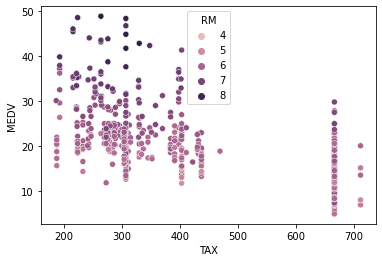

In [28]:
sns.scatterplot(y='MEDV',x='TAX',hue='RM',data=final_boston)

<AxesSubplot:xlabel='RM', ylabel='TAX'>

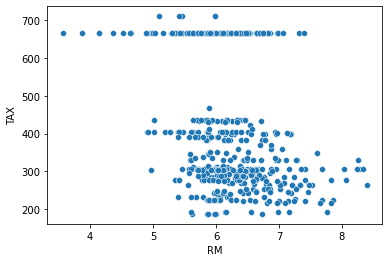

In [29]:
sns.scatterplot(x='RM',y='TAX',data=final_boston)

In [30]:
final_boston[final_boston['TAX']>=700]

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
488,27.74,0.609,5.454,711.0,20.1,18.06,15.2
489,27.74,0.609,5.414,711.0,20.1,23.97,7.0
490,27.74,0.609,5.093,711.0,20.1,29.68,8.1
491,27.74,0.609,5.983,711.0,20.1,18.07,13.6
492,27.74,0.609,5.983,711.0,20.1,13.35,20.1


In [34]:
final_boston_1=final_boston[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]

In [44]:
final_boston_1['RM_rounded']=final_boston_1['RM'].round(decimals=0)

In [39]:
final_boston_1.dtypes

INDUS      float64
NOX        float64
RM         float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [46]:
final_boston_1.drop(columns='RM',inplace=True)

<AxesSubplot:xlabel='RM_rounded', ylabel='MEDV'>

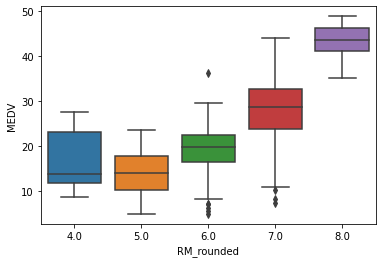

In [47]:
sns.boxplot(y='MEDV',x='RM_rounded',data=final_boston_1)

In [50]:
final_boston_1[(final_boston_1['RM_rounded']==6)&(final_boston_1['MEDV']<=8)]

,INDUS,NOX,TAX,PTRATIO,LSTAT,MEDV,RM_rounded
399,18.1,0.693,666.0,20.2,29.97,6.3,6.0
400,18.1,0.693,666.0,20.2,26.77,5.6,6.0
401,18.1,0.693,666.0,20.2,20.32,7.2,6.0
405,18.1,0.693,666.0,20.2,22.98,5.0,6.0
415,18.1,0.679,666.0,20.2,29.05,7.2,6.0


In [51]:
final_boston_1[(final_boston_1['RM_rounded']==7)&(final_boston_1['MEDV']<=10)]

,INDUS,NOX,TAX,PTRATIO,LSTAT,MEDV,RM_rounded
416,18.1,0.679,666.0,20.2,25.79,7.5,7.0
419,18.1,0.718,666.0,20.2,22.74,8.4,7.0


In [52]:
final_boston_1[(final_boston_1['RM_rounded']==6)&(final_boston_1['MEDV']>=30)]

,INDUS,NOX,TAX,PTRATIO,LSTAT,MEDV,RM_rounded
181,2.46,0.488,193.0,17.8,9.45,36.2,6.0
